In [9]:
## Final project2 : Tesla, 비트코인, 삼성전자, Apple 투자 포트폴리오 작성
## 작성자 : 소프트웨어융합학과 2017111402 안예린

import pandas as pd

# 지수 표현을 실수로 모두 표현
pd.options.display.float_format = '{:.5f}'.format

# Dataframe 초기화
del[[std_error]]

## 0. Load Dataset
bitcoin_pred = pd.read_csv("forecast_bitcoin.csv")
bitcoin_pred["ds"] = pd.to_datetime(bitcoin_pred["ds"], format = "%Y/%m/%d")
bitcoin = bitcoin_pred.loc[:, ["ds","yhat","yhat_lower","yhat_upper"]]

samsung_pred = pd.read_csv("forecast_samsung.csv")
samsung_pred["ds"] = pd.to_datetime(samsung_pred["ds"], format = "%Y/%m/%d")
samsung = samsung_pred.loc[:, ["ds","yhat","yhat_lower","yhat_upper"]]

tesla_pred = pd.read_csv("forecast_tesla.csv")
tesla_pred["ds"] = pd.to_datetime(tesla_pred["ds"], format = "%Y/%m/%d")
tesla = tesla_pred.loc[:, ["ds","yhat","yhat_lower","yhat_upper"]]

apple_pred = pd.read_csv("forecast_apple.csv")
apple_pred["ds"] = pd.to_datetime(apple_pred["ds"], format = "%Y/%m/%d")
apple= apple_pred.loc[:, ["ds","yhat","yhat_lower","yhat_upper"]]

# 표준 오차 Dataframe
std_error = pd.DataFrame(columns = ['bitcoin','samsung','apple','tesla'])

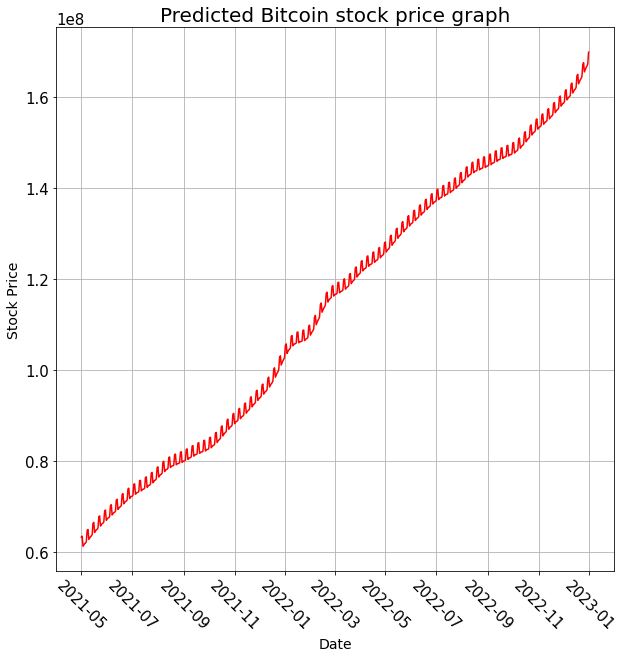

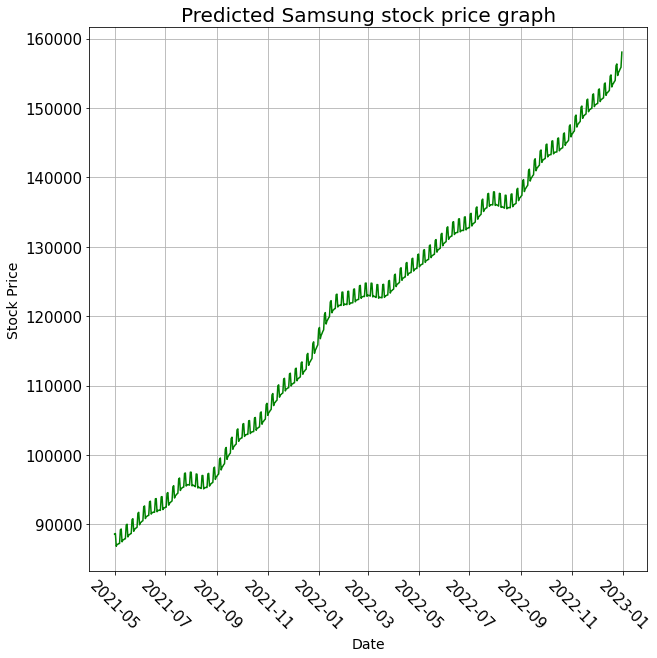

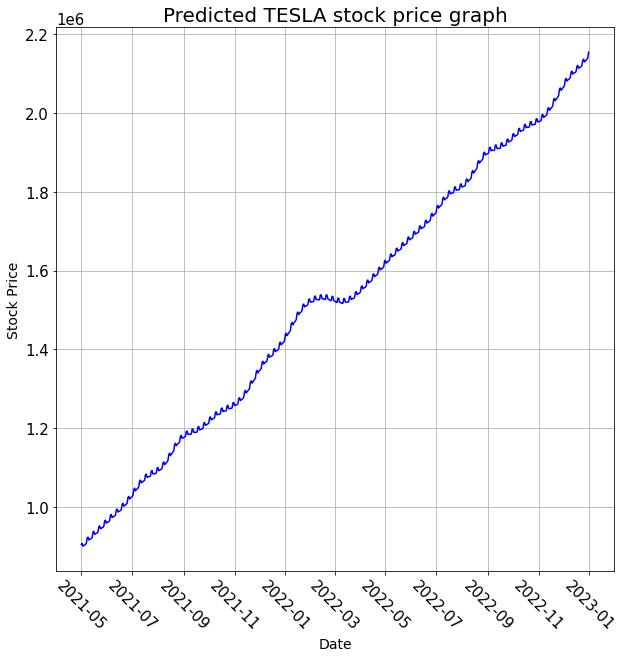

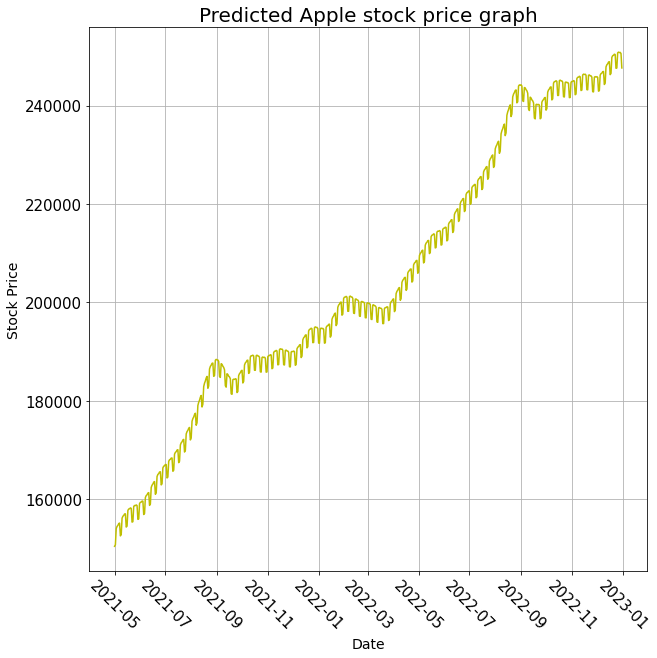

In [10]:
## 1. matplotlib를 사용하여 데이터를 시각화
import matplotlib.pyplot as plt

# 예측 결과 그래프 그리기 - 비트코인
plt.title("Predicted Bitcoin stock price graph", fontsize = 20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.xticks(rotation = - 45 )
plt.plot(bitcoin.ds, bitcoin.yhat, color ="r")
plt.grid()
plt.show()

# 예측 결과 그래프 그리기 - 삼성전자
plt.title("Predicted Samsung stock price graph", fontsize = 20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.xticks(rotation = - 45 )
plt.plot(samsung.ds, samsung.yhat, color ="g")
plt.grid()
plt.show()

# 예측 결과 그래프 그리기 - Tesla
plt.title("Predicted TESLA stock price graph", fontsize = 20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.xticks(rotation = - 45 )
plt.plot(tesla.ds, tesla.yhat, color ="b")
plt.grid()
plt.show()

# 예측 결과 그래프 그리기 - Apple
plt.title("Predicted Apple stock price graph", fontsize = 20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.xticks(rotation = - 45 )
plt.plot(apple.ds, apple.yhat, color="y")
plt.grid()
plt.show()

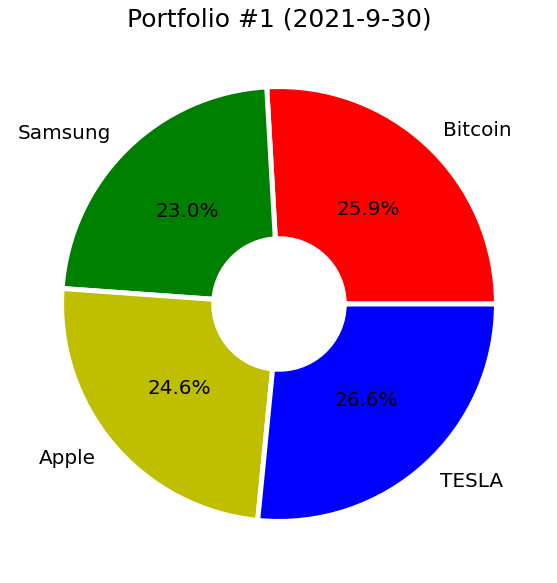

In [11]:
## 2. 투자 포트폴리오 구성 (2021-9-30)
# 기준 날짜
list_of_dates = ['2021-5-1','2021-9-30', '2021-12-31', '2022-3-31','2022-6-30']

# 기준 날짜 내의 데이터 필터링
filtered_bitcoin = bitcoin[bitcoin["ds"].isin(pd.date_range(list_of_dates[0], list_of_dates[1]))]
filtered_samsung = samsung[samsung["ds"].isin(pd.date_range(list_of_dates[0], list_of_dates[1]))]
filtered_apple = apple[apple["ds"].isin(pd.date_range(list_of_dates[0], list_of_dates[1]))]
filtered_tesla = tesla[tesla["ds"].isin(pd.date_range(list_of_dates[0], list_of_dates[1]))]

# 상승률 (마지막 날 주가 / 첫날 주가 * 100) 계산
end = len(filtered_bitcoin) - 1
bit_change = round(filtered_bitcoin.yhat[end]/filtered_bitcoin.yhat[0] * 100,2)
sam_change = round(filtered_samsung.yhat[end]/filtered_samsung.yhat[0] * 100,2)
app_change = round(filtered_apple.yhat[end]/filtered_apple.yhat[0] * 100,2)
tes_change = round(filtered_tesla.yhat[end]/filtered_tesla.yhat[0] * 100,2)

# 오차율 계산 (하한가로만 계산함)
b = (end+1) ** 0.5
bit = (((sum((filtered_bitcoin['yhat'] - filtered_bitcoin['yhat_lower']) **2))/len(filtered_bitcoin['yhat'])) ** 0.5) / b
sam =  (((sum((filtered_samsung['yhat'] - filtered_samsung['yhat_lower']) **2))/len(filtered_samsung['yhat'])) ** 0.5) / b
app = (((sum((filtered_apple['yhat'] - filtered_apple['yhat_lower']) **2))/len(filtered_apple['yhat'])) ** 0.5) / b
tes = (((sum((filtered_tesla['yhat'] - filtered_tesla['yhat_lower']) **2))/len(filtered_tesla['yhat'])) ** 0.5) / b
std_error = std_error.append({'bitcoin':bit,'samsung':sam,'apple':app,'tesla':tes},ignore_index=True)

# PLOT
plt.title("Portfolio #1 (2021-9-30)", fontsize =25)
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('font', size=20)
ratio = [bit_change, sam_change, app_change, tes_change]
labels = ['Bitcoin', 'Samsung', 'Apple', 'TESLA']
colors = ['r', 'g', 'y', 'b']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=colors,wedgeprops=wedgeprops)
plt.show()

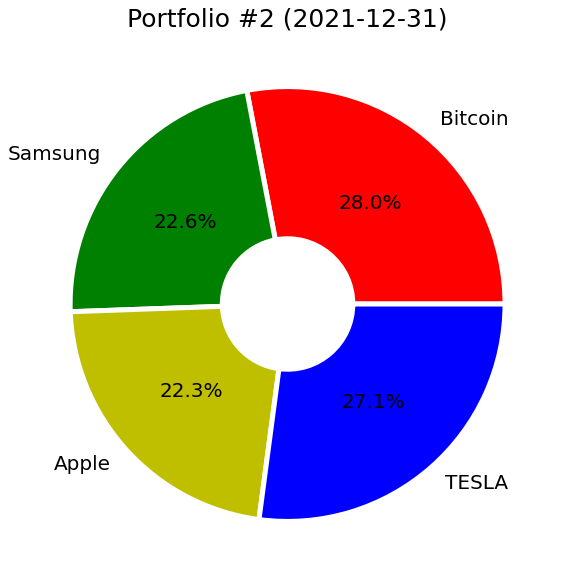

In [12]:
## 2. 투자 포트폴리오 구성
# 기준 날짜 (2021-12-31)
list_of_dates = ['2021-5-1','2021-9-30', '2021-12-31', '2022-3-31','2022-6-30']

# 기준 날짜내의 데이터 필터링
filtered_bitcoin = bitcoin[bitcoin["ds"].isin(pd.date_range(list_of_dates[0], list_of_dates[2]))]
filtered_samsung = samsung[samsung["ds"].isin(pd.date_range(list_of_dates[0], list_of_dates[2]))]
filtered_apple = apple[apple["ds"].isin(pd.date_range(list_of_dates[0], list_of_dates[2]))]
filtered_tesla = tesla[tesla["ds"].isin(pd.date_range(list_of_dates[0], list_of_dates[2]))]

# 상승률 계산 (마지막 날 주가 / 첫날 주가 * 100) 계산
end = len(filtered_bitcoin) - 1
bit_change = round(filtered_bitcoin.yhat[end]/filtered_bitcoin.yhat[0] * 100,2)
sam_change = round(filtered_samsung.yhat[end]/filtered_samsung.yhat[0] * 100,2)
app_change = round(filtered_apple.yhat[end]/filtered_apple.yhat[0] * 100,2)
tes_change = round(filtered_tesla.yhat[end]/filtered_tesla.yhat[0] * 100,2)

# 오차율 계산 (하한가로만 계산함)
b = (end+1) ** 0.5
bit = (((sum((filtered_bitcoin['yhat'] - filtered_bitcoin['yhat_lower']) **2))/len(filtered_bitcoin['yhat'])) ** 0.5) / b
sam =  (((sum((filtered_samsung['yhat'] - filtered_samsung['yhat_lower']) **2))/len(filtered_samsung['yhat'])) ** 0.5) / b
app = (((sum((filtered_apple['yhat'] - filtered_apple['yhat_lower']) **2))/len(filtered_apple['yhat'])) ** 0.5) / b
tes = (((sum((filtered_tesla['yhat'] - filtered_tesla['yhat_lower']) **2))/len(filtered_tesla['yhat'])) ** 0.5) / b
std_error = std_error.append({'bitcoin':bit,'samsung':sam,'apple':app,'tesla':tes}, ignore_index=True)

# PLOT
plt.title("Portfolio #2 (2021-12-31)", fontsize =25)
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('font', size=20)
ratio = [bit_change, sam_change, app_change, tes_change]
labels = ['Bitcoin', 'Samsung', 'Apple', 'TESLA']
colors = ['r', 'g', 'y', 'b']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=colors,wedgeprops=wedgeprops)
plt.show()

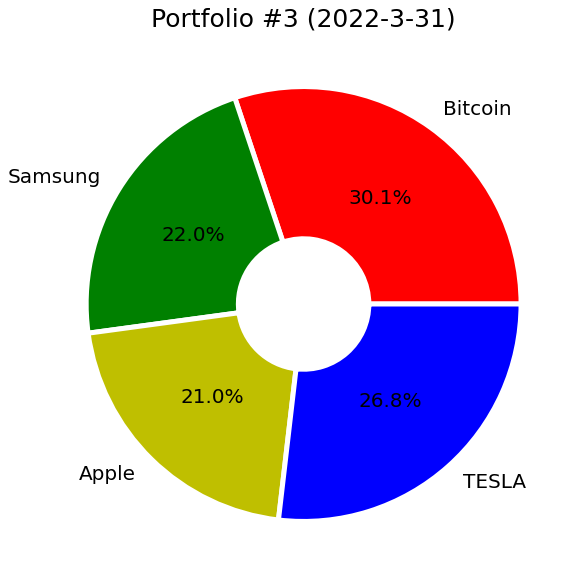

In [13]:
## 2. 투자 포트폴리오 구성
# 기준 날짜 (2022-3-31)
list_of_dates = ['2021-5-1','2021-9-30', '2021-12-31', '2022-3-31','2022-6-30']

# 기준 날짜내의 데이터 필터링
filtered_bitcoin = bitcoin[bitcoin["ds"].isin(pd.date_range(list_of_dates[0], list_of_dates[3]))]
filtered_samsung = samsung[samsung["ds"].isin(pd.date_range(list_of_dates[0], list_of_dates[3]))]
filtered_apple = apple[apple["ds"].isin(pd.date_range(list_of_dates[0], list_of_dates[3]))]
filtered_tesla = tesla[tesla["ds"].isin(pd.date_range(list_of_dates[0], list_of_dates[3]))]

# 상승률 계산 (마지막 날 주가 / 첫날 주가 * 100) 계산
end = len(filtered_bitcoin) - 1
bit_change = round(filtered_bitcoin.yhat[end]/filtered_bitcoin.yhat[0] * 100,2)
sam_change = round(filtered_samsung.yhat[end]/filtered_samsung.yhat[0] * 100,2)
app_change = round(filtered_apple.yhat[end]/filtered_apple.yhat[0] * 100,2)
tes_change = round(filtered_tesla.yhat[end]/filtered_tesla.yhat[0] * 100,2)

# 오차율 계산 (하한가로만 계산함)
b = (end+1) ** 0.5
bit = (((sum((filtered_bitcoin['yhat'] - filtered_bitcoin['yhat_lower']) **2))/len(filtered_bitcoin['yhat'])) ** 0.5) / b
sam =  (((sum((filtered_samsung['yhat'] - filtered_samsung['yhat_lower']) **2))/len(filtered_samsung['yhat'])) ** 0.5) / b
app = (((sum((filtered_apple['yhat'] - filtered_apple['yhat_lower']) **2))/len(filtered_apple['yhat'])) ** 0.5) / b
tes = (((sum((filtered_tesla['yhat'] - filtered_tesla['yhat_lower']) **2))/len(filtered_tesla['yhat'])) ** 0.5) / b
std_error = std_error.append({'bitcoin':bit,'samsung':sam,'apple':app,'tesla':tes}, ignore_index=True)

# PLOT
plt.title("Portfolio #3 (2022-3-31)", fontsize =25)
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('font', size=20)
ratio = [bit_change, sam_change, app_change, tes_change]
labels = ['Bitcoin', 'Samsung', 'Apple', 'TESLA']
colors = ['r', 'g', 'y', 'b']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=colors,wedgeprops=wedgeprops)
plt.show()

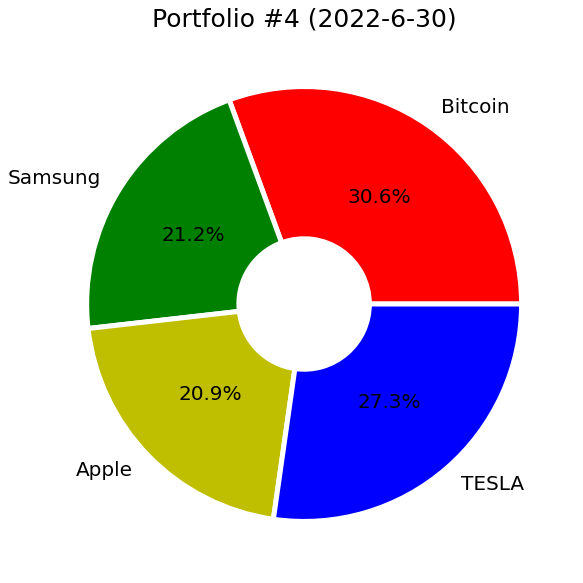

In [14]:
## 2. 투자 포트폴리오 구성
# 기준 날짜 (2022-6-30)
list_of_dates = ['2021-5-1','2021-9-30', '2021-12-31', '2022-3-31','2022-6-30']

# 기준 날짜내의 데이터 필터링
filtered_bitcoin = bitcoin[bitcoin["ds"].isin(pd.date_range(list_of_dates[0], list_of_dates[4]))]
filtered_samsung = samsung[samsung["ds"].isin(pd.date_range(list_of_dates[0], list_of_dates[4]))]
filtered_apple = apple[apple["ds"].isin(pd.date_range(list_of_dates[0], list_of_dates[4]))]
filtered_tesla = tesla[tesla["ds"].isin(pd.date_range(list_of_dates[0], list_of_dates[4]))]

# 상승률 계산 (마지막 날 주가 / 첫날 주가 * 100) 계산
end = len(filtered_bitcoin) - 1
bit_change = round(filtered_bitcoin.yhat[end]/filtered_bitcoin.yhat[0] * 100,2)
sam_change = round(filtered_samsung.yhat[end]/filtered_samsung.yhat[0] * 100,2)
app_change = round(filtered_apple.yhat[end]/filtered_apple.yhat[0] * 100,2)
tes_change = round(filtered_tesla.yhat[end]/filtered_tesla.yhat[0] * 100,2)

# 오차율 계산 (하한가로만 계산함)
b = (end+1) ** 0.5
bit = (((sum((filtered_bitcoin['yhat'] - filtered_bitcoin['yhat_lower']) **2))/len(filtered_bitcoin['yhat'])) ** 0.5) / b
sam =  (((sum((filtered_samsung['yhat'] - filtered_samsung['yhat_lower']) **2))/len(filtered_samsung['yhat'])) ** 0.5) / b
app = (((sum((filtered_apple['yhat'] - filtered_apple['yhat_lower']) **2))/len(filtered_apple['yhat'])) ** 0.5) / b
tes = (((sum((filtered_tesla['yhat'] - filtered_tesla['yhat_lower']) **2))/len(filtered_tesla['yhat'])) ** 0.5) / b
std_error = std_error.append({'bitcoin':bit,'samsung':sam,'apple':app,'tesla':tes}, ignore_index=True)

# PLOT
plt.title("Portfolio #4 (2022-6-30)", fontsize =25)
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('font', size=20)
ratio = [bit_change, sam_change, app_change, tes_change]
labels = ['Bitcoin', 'Samsung', 'Apple', 'TESLA']
colors = ['r', 'g', 'y', 'b']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=colors,wedgeprops=wedgeprops)
plt.show()

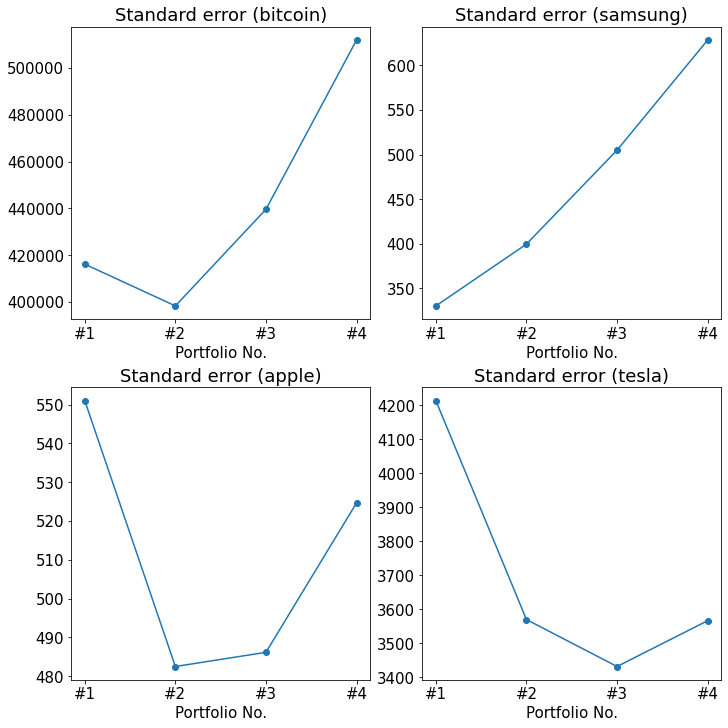

In [15]:
# 표준 오차 plot

x = ["#1","#2","#3","#4"]
plt.rc('font', size=15)
plt.subplots(constrained_layout=True)
plt.subplot(221)
y1 = std_error["bitcoin"]
plt.title("Standard error (bitcoin)")
plt.xlabel("Portfolio No.")
plt.scatter(x,y1)
plt.plot(x,y1)

plt.subplot(222)
y2 = std_error["samsung"]
plt.title("Standard error (samsung)")
plt.xlabel("Portfolio No.")
plt.scatter(x,y2)
plt.plot(x,y2)

plt.subplot(223)
y3 = std_error["apple"]
plt.title("Standard error (apple)")
plt.xlabel("Portfolio No.")
plt.scatter(x,y3)
plt.plot(x,y3)

plt.subplot(224)
y4 = std_error["tesla"]
plt.title("Standard error (tesla)")
plt.xlabel("Portfolio No.")
plt.scatter(x,y4)
plt.plot(x,y4)

plt.show()